<a href="https://colab.research.google.com/github/sumitdahiya619/Digit-Recognition-System/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

5


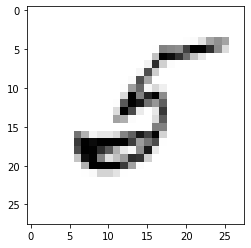

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 1111 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Building the Convolutional Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

# Compiling and Fitting the Model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2024 - accuracy: 0.9385
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0797 - accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0548 - accuracy: 0.9822
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0420 - accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0334 - accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0287 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0223 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0196 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0194 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 30s 16m

# Evaluating the Model

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0550 - accuracy: 0.9856


[0.054963450878858566, 0.9855999946594238]

9


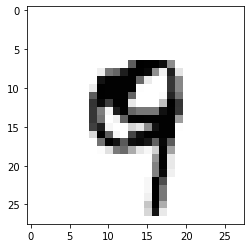

In [ ]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())